In [1]:
%load_ext watermark
%watermark


ModuleNotFoundError: No module named 'watermark'

In [2]:
# Import libraries
# ----------------

# Pandas
import pandas as pd

# Matplotlib
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Data Loading

In [3]:
raw_data_file = "../data/titanic.csv"
df = pd.read_csv(raw_data_file, usecols=['Name', 'Sex', 'Age', 'Survived'])
print('DataFrame shape: {}'.format(df.shape))
df.head()

DataFrame shape: (891, 4)


,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


# Data Cleaning

In [4]:
# Percentage of missing values in each column
pd.DataFrame(
    df.isnull().sum() / len(df),
    columns=['% Missing Values']
).transpose()

,Survived,Name,Sex,Age
% Missing Values,0.0,0.0,0.0,0.198653


About a fifth of the passenger ages is missing. We may substitute the missing values with the age mean or median. To understand which one to choose, let us have a look at the histogram of the passenger age,


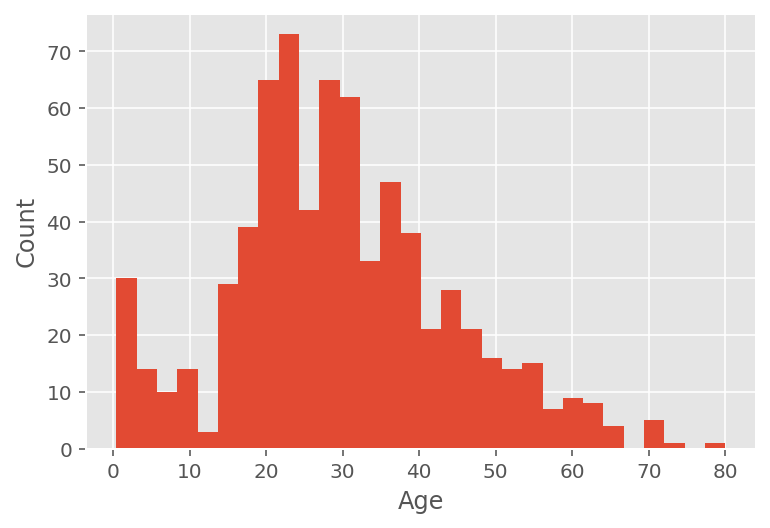

In [5]:
df.Age.hist(bins = 30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Because the age has a tail for higher values, we choose the median to replace missing values, as the median is more robust than the mean against extreme values.


In [6]:
df = df.fillna({'Age': df.Age.median(),})
df.head()

,Survived,Name,Sex,Age
0,0,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,"Heikkinen, Miss. Laina",female,26.0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,"Allen, Mr. William Henry",male,35.0


In [7]:
## Assign a variable to each column
df = df.astype({
    'Age': 'float64',
    'Name': 'object',
    'Sex': 'category',
    'Survived': 'int64',
})

In [8]:


# Extract the Title from the name

simplify_title = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
}

df['Title'] = df['Name'].apply(
    lambda full_name: (
        simplify_title[
            # Example: Uruchurtu, Don. Manuel E --> Don
            full_name.split(',')[1].split('.')[0].strip()
        ]
    )
)

df['Title'] = df['Title'].astype('category')

df.head()



,Survived,Name,Sex,Age,Title
0,0,"Braund, Mr. Owen Harris",male,22.0,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,Mrs
2,1,"Heikkinen, Miss. Laina",female,26.0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,Mrs
4,0,"Allen, Mr. William Henry",male,35.0,Mr


# Predictions

In [9]:
# Select variables
df = df[['Age', 'Sex', 'Title', 'Survived']]

# One-hot encoding of categorical variables
df = pd.get_dummies(df, columns=['Sex', 'Title'])

# Train and test split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1).values,
    df['Survived'].values,
    test_size=0.2,
    random_state=0
)

In [10]:
# Use majority vote as benchmark for classifier

In [11]:
# Mjority vote classifier
majority_vote = round(y_train.mean())
y_test_predictions = [majority_vote] * len(y_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_test_predictions)
print('The prediction accuracy with the majority vote classifier is {:.1f}%'.format(accuracy * 100))

The prediction accuracy with the majority vote classifier is 61.5%


In [15]:
# NExt build a Ridge logistic regression

In [12]:


# Ridge logistic regression

lr = LogisticRegression(random_state=0, solver='lbfgs')

param_range = [2 ** x for x in range(-10, 10)]

gs = GridSearchCV(
    estimator=lr,
    param_grid={'C': param_range},
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

gs.fit(X_train, y_train)

accuracy = accuracy_score(y_true=y_test, y_pred=gs.predict(X_test))

print('The prediction accuracy with the ridge logistic regression classifier is {:.1f}%'.format(accuracy * 100))



The prediction accuracy with the ridge logistic regression classifier is 78.2%
